<br>
<br>

# `# Bias Variance Trade-off in Random Forest:`

<br>
<br>

In [29]:

import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [8]:

X,y = make_circles(n_samples=500,noise=0.35,factor=0.1,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [9]:
X.shape

(500, 2)

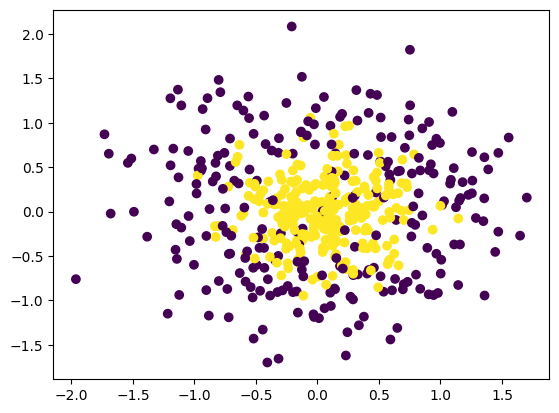

In [10]:

plt.scatter(x=X[:,0],y=X[:,1],c=y)


In [ ]:

# fully grown decision tree:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

<Axes: >

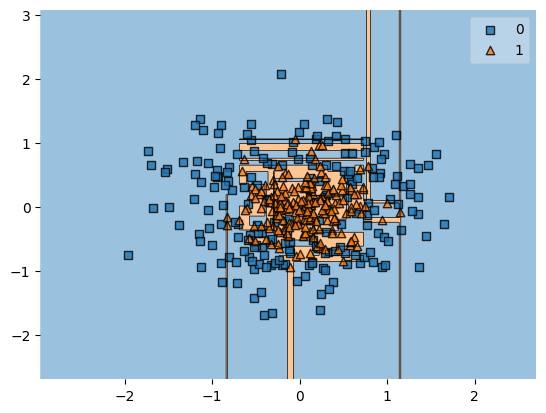

In [ ]:

# with mlxtend: 
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,y_train,clf=dt)


In [36]:
X[:4]

array([[-0.09323862,  0.29904164],
       [ 0.41589841,  1.11023783],
       [ 0.09875051,  0.05437662],
       [-0.3186161 , -0.4985571 ]])

In [38]:
X.max()

np.float64(2.0822066281079223)

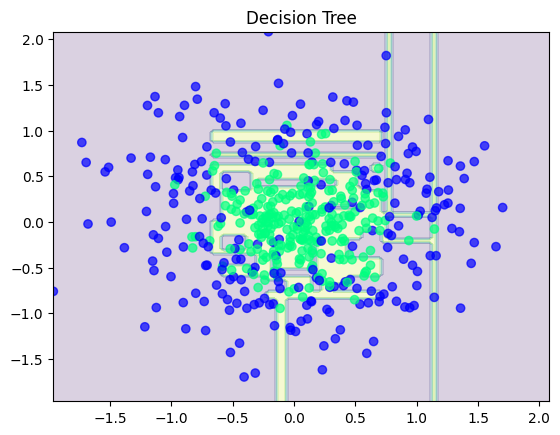

In [ ]:


# from this we can say that, decision tree is high_bias,low_variance model:

# with numpy meshgird:
X_range = np.linspace(start=X.min(),stop=X.max(),num=100)
xx1,xx2 = np.meshgrid(X_range,X_range)

# np.c_ combine two column vector or matrix
y_hat = dt.predict(np.c_[xx1.ravel(),xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)

plt.contourf(xx1,xx2,y_hat,alpha=0.2)
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap='winter',alpha=0.7)
plt.title("Decision Tree")
plt.show()


In [33]:

# mesh grid in numpy: 
xx1.shape,xx2.shape # in the xrange we got: 100 values

((100, 100), (100, 100))

<br>
<br>

# #Using random Forest:

<br>
<br>

In [40]:

rf = RandomForestClassifier(n_estimators=500,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

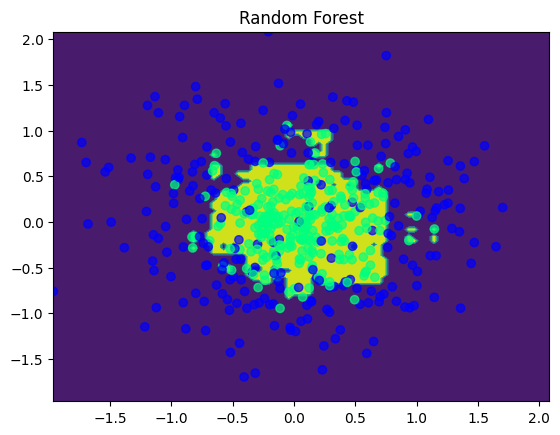

In [ ]:

# here, some tranning error is increase simultanously, testing or variance is increase

plt.Figure(figsize=(8,10))
y_hat = rf.predict(np.c_[xx1.ravel(),xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1,xx2,y_hat)
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap='winter',alpha=0.7)
plt.title("Random Forest")
plt.show()
